In [122]:
from IPython.core.interactiveshell import InteractiveShell   
InteractiveShell.ast_node_interactivity = "all"
import numpy as np, pandas as pd, matplotlib.pylab as plt, seaborn as sns, statsmodels.api as sm
from sklearn.model_selection import train_test_split as tts
from scipy.stats import shapiro
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.cluster import KMeans
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA, LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
import sklearn
from sklearn import tree
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [123]:
df = pd.read_excel('Критерии ручная v1.xlsx')
df.head()

,Навзвание,01.1.1 Ф Соответствие стратегии Фонда/попадание в проблемное поле Фонда/соответствие программному портфелю Фонда,01.1.2 Ф Уровень репутационных рисков Фонда,"01.1.3 Ф Способность команды к самообучению, анализу и рефлексии",01.2.1 Ф Соответствие целям ESG Банка,01.2.2 Ф Соответствие политике благотворительной деятельности Банка,02.1.2 Ф Масштаб проблемы\n,02.1.3 Ф Существенность (острота) проблемы\n,02.1.4 Ф Степень неравенства\n,"02.2.1 Ф Количество благополучателей, вовлеченных в реализацию решения\n",...,Кто является прямым благополучателем решения? Выберите группу или группы из библиотеки.,Каков импакт-тезис решения?,Какова цель реализации решения?,Какие типовые социальные результаты будут достигнуты в случае реализации решения?,Насколько масштабным является представленное решение?,К какому типу относится представленное решение?,Насколько высокие требования необходимо предъявить к уровню доказательности для этого решения?,Каков размер бюджета решения?,Класс решения,ссылка
0,Доказательное образование,8,8,1.0,4,NaN,7,1,3,1,...,Директора школ и дошкольных образвовательных о...,1 балл - Импакт-тезис не сформулирован,Обеспечение возможности получения обратной свя...,Повышение прозрачности системы образования для...,национальный,Разработка нового или существенная переработка...,Средний уровень доказательной базы (5-7 балло...,Крупный (от 10 млн. руб. до 50 млн.руб),NaN,\n
1,Все получится,8,8,7.0,9,NaN,7,8,8,6,...,НКО – провайдеры услуг,8-10 Тезис сформулирован полностью,Развитие условий для эффективной социализации ...,Нет данных,региональный,Масштабирование или инфраструктурный проект,Высокий уровень доказательности (8-10 баллов)....,Крупный (от 10 млн. руб. до 50 млн.руб),NaN,https://vbudushee.ru/education/
2,Финансовая грамотность,7,6,5.0,5,5.0,9,8,3,8,...,"школьники, педагоги, воспитанники детских домов",8-10 Тезис сформулирован полностью,содействовать формированию финансово грамотног...,Методические рекомендации по теме Благополучия...,национальный,Разработка нового или существенная переработка...,Высокий уровень доказательности (8-10 баллов)....,Крупный (от 10 млн. руб. до 50 млн.руб),NaN,https://vbudushee.ru/education/
3,«ИИ Старт»,9,7,NaN,5,4.0,8,6,4,8,...,"школьники, педагоги",8-10 Тезис сформулирован полностью,ранняя профориентация и развитие прикладных\nн...,Обучение педагогов на курсе повышения квалифик...,национальный,Масштабирование или инфраструктурный проект,Высокий уровень доказательности (8-10 баллов)....,Крупный (от 10 млн. руб. до 50 млн.руб),NaN,ссылка отсутствует
4,Добрый новогодний подарок,5,1,NaN,5,10.0,3,4,8,3,...,"НКО, реализующих программы психолого социальн...",NaN,повысить качество жизни и открыть для детей с ...,"вклад сбера в благотворительность, социальная ...",региональный,Масштабирование или инфраструктурный проект,Средний уровень доказательной базы (5-7 балло...,Малый (500 т. руб. - 1 млн. руб.),NaN,https://konkursdngp.vbudushee.ru/public/api/v ...


In [162]:
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 6)
df
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

,Навзвание,01.1.1 Ф Соответствие стратегии Фонда/попадание в проблемное поле Фонда/соответствие программному портфелю Фонда,01.1.2 Ф Уровень репутационных рисков Фонда,...,Насколько высокие требования необходимо предъявить к уровню доказательности для этого решения?,Каков размер бюджета решения?,ссылка
0,Доказательное образование,8,8,...,Средний уровень доказательной базы (5-7 балло...,Крупный (от 10 млн. руб. до 50 млн.руб),\n
1,Все получится,8,8,...,Высокий уровень доказательности (8-10 баллов)....,Крупный (от 10 млн. руб. до 50 млн.руб),https://vbudushee.ru/education/
2,Финансовая грамотность,7,6,...,Высокий уровень доказательности (8-10 баллов)....,Крупный (от 10 млн. руб. до 50 млн.руб),https://vbudushee.ru/education/
...,...,...,...,...,...,...,...
39,Устройство распознавания речи для глухих и сле...,4,4,...,"Слабая доказательная база, заявитель способен ...",Малый (500 т. руб. - 1 млн. руб.),https://smarteka.com/practices/ustrojstvo-rasp...
40,Специальное транспортное обслуживание,4,4,...,Средний уровень доказательной базы (5-7 балло...,Средний (1 млн. руб. - 10 млн. руб.),https://smarteka.com/practices/specialnoe-tran...
41,Программа онлайн-тренировок навыков самостояте...,5,4,...,Высокий уровень доказательности (8-10 баллов)....,Малый (500 т. руб. - 1 млн. руб.),https://smarteka.com/practices/programma-onlaj...


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 81 columns):
 #   Column                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                            --------------  -----  
 0   Навзвание                                                                                                         42 non-null     object 
 1   01.1.1 Ф Соответствие стратегии Фонда/попадание в проблемное поле Фонда/соответствие программному портфелю Фонда  42 non-null     int64  
 2   01.1.2 Ф Уровень репутационных рисков Фонда                                                                       42 non-null     int64  
 3   01.1.3 Ф Способность команды к самообучению, анализу и рефлексии                                                  42 non-null     float64
 4   01.2.1 Ф Соответствие целям ESG Ба

In [124]:
df = df.drop('Класс решения', axis=1)

In [125]:
df = df.fillna(value=0)

<Figure size 2880x2880 with 0 Axes>

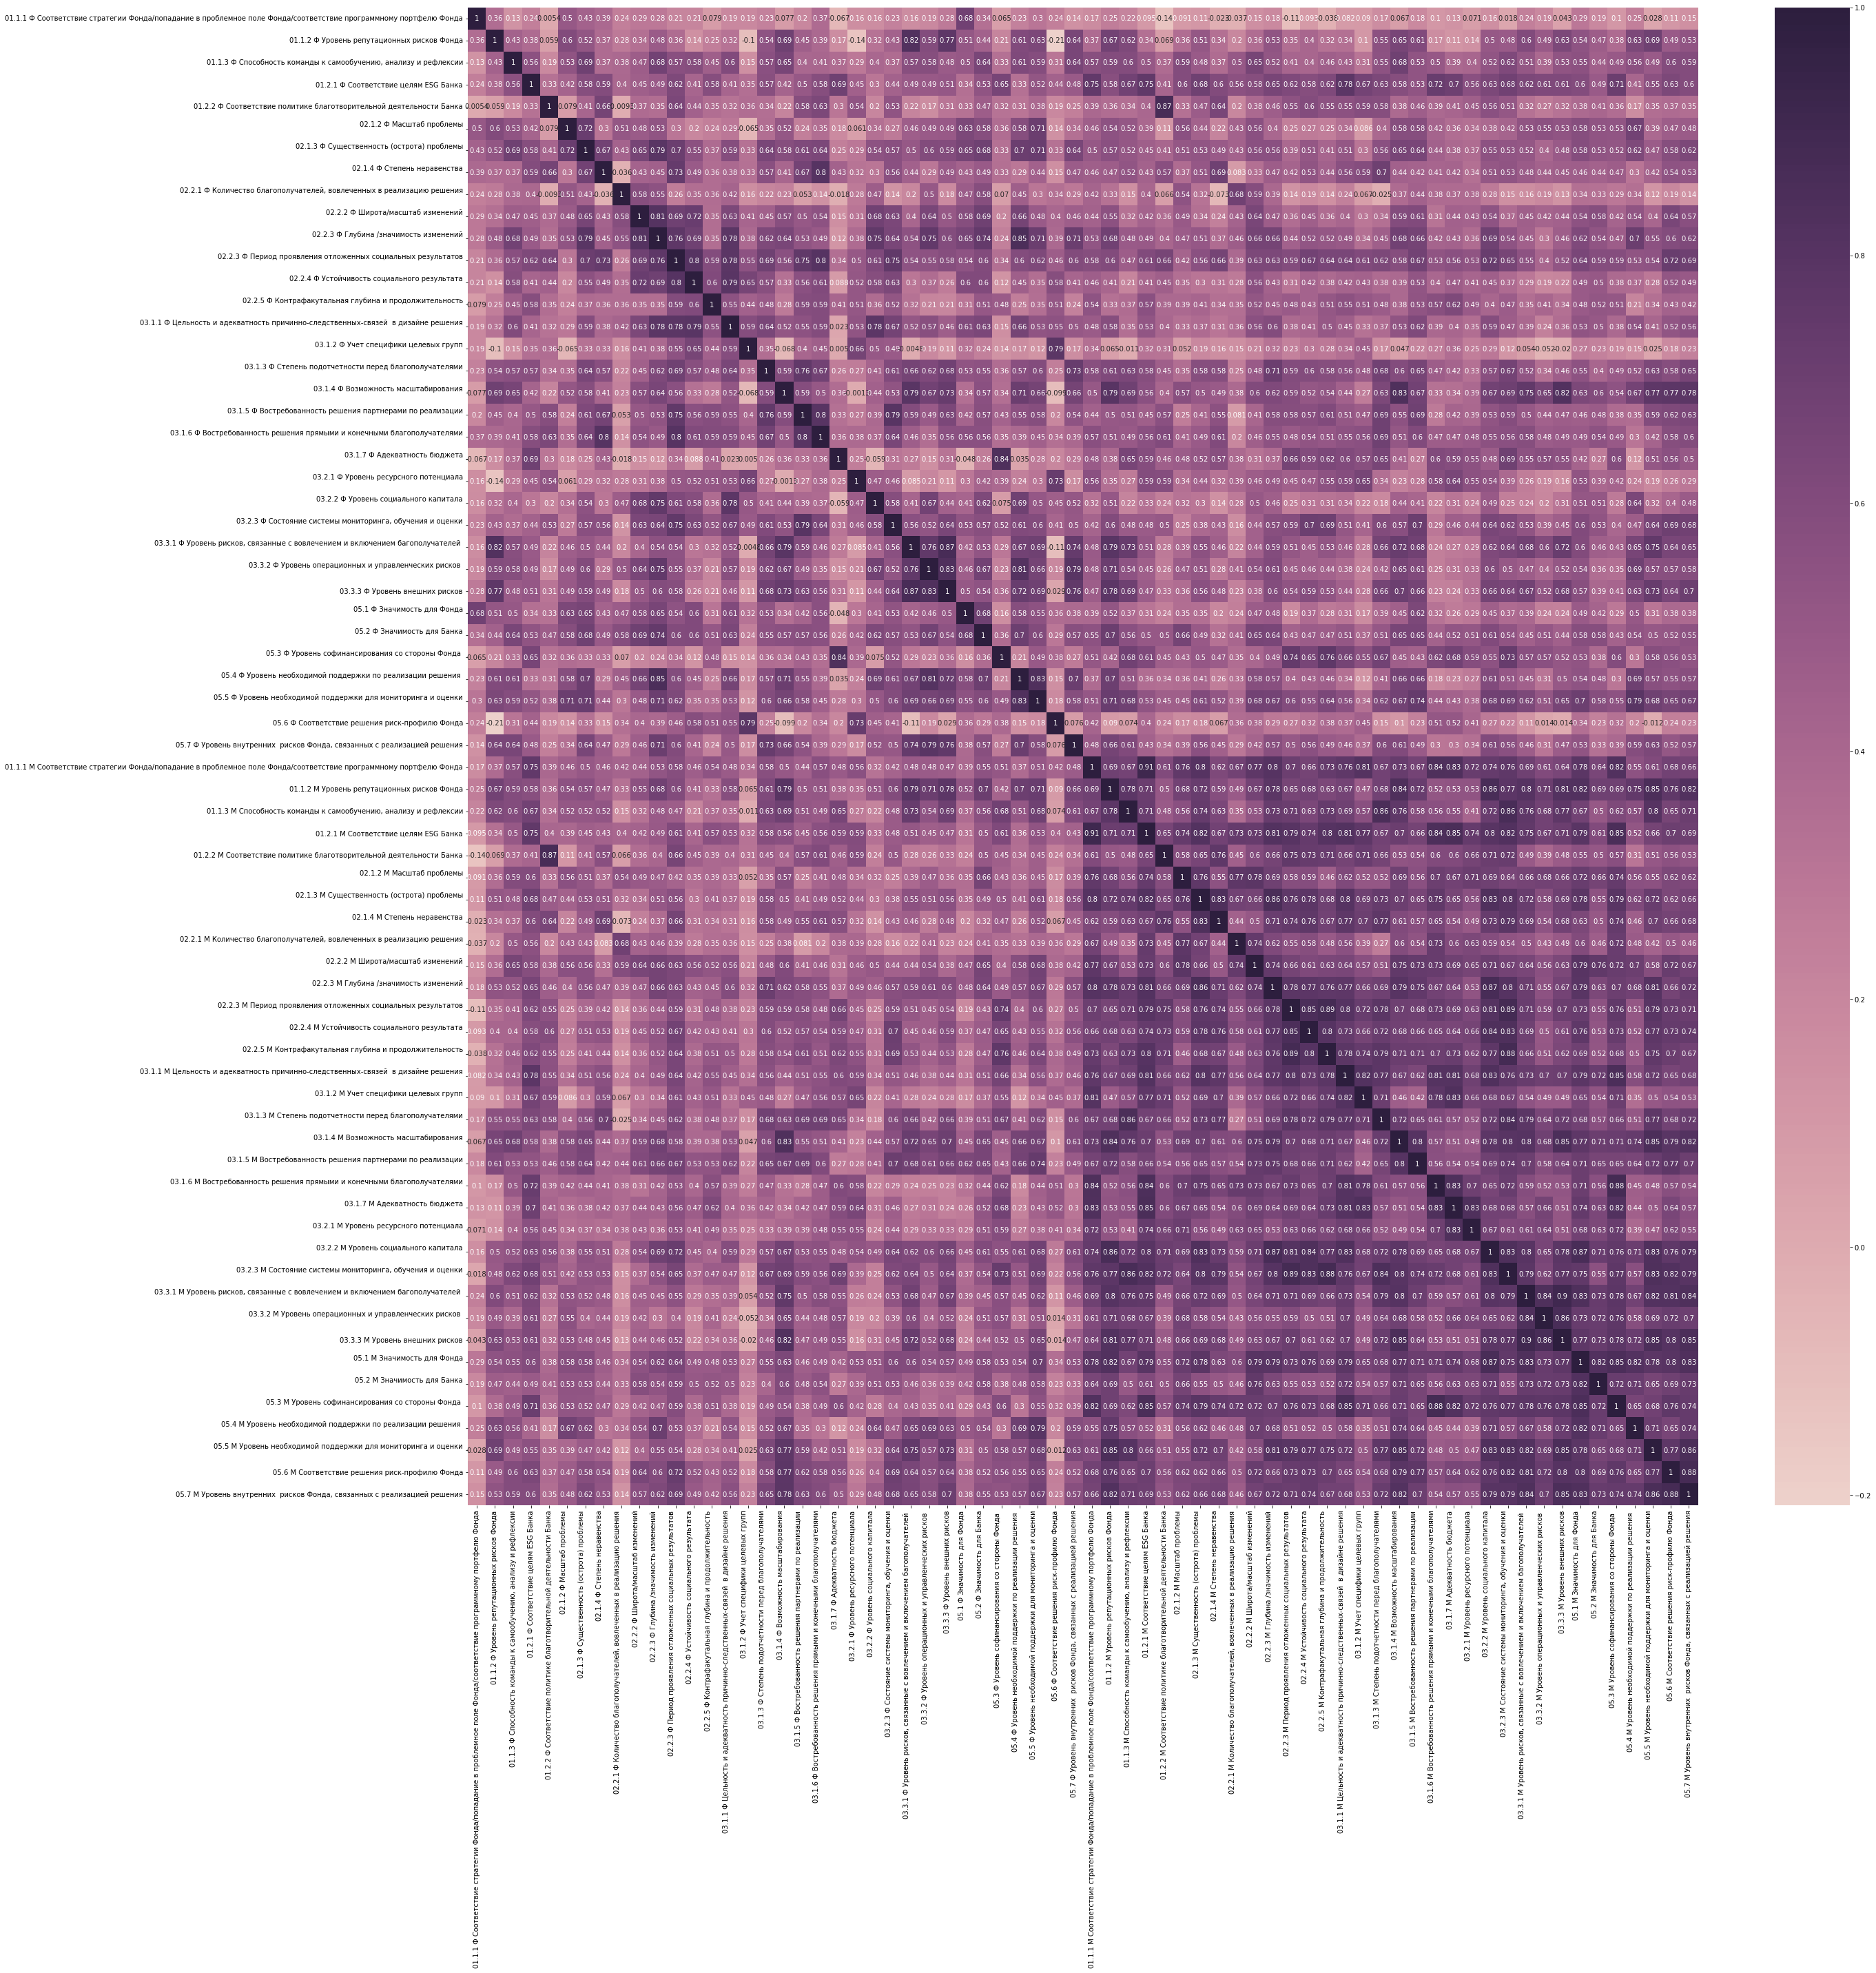

In [115]:
plt.figure(figsize=(40, 40))
ax = sns.heatmap(df.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

In [126]:
df1 = df.iloc[:,1:35]
df2 = df.iloc[:,36:69]
df3 = df.iloc[:,70:]
df4 = df.iloc[:,1:69]

In [127]:
df1.head()
df2.head()
df3.head()

,01.1.1 Ф Соответствие стратегии Фонда/попадание в проблемное поле Фонда/соответствие программному портфелю Фонда,01.1.2 Ф Уровень репутационных рисков Фонда,"01.1.3 Ф Способность команды к самообучению, анализу и рефлексии",01.2.1 Ф Соответствие целям ESG Банка,01.2.2 Ф Соответствие политике благотворительной деятельности Банка,02.1.2 Ф Масштаб проблемы\n,02.1.3 Ф Существенность (острота) проблемы\n,02.1.4 Ф Степень неравенства\n,"02.2.1 Ф Количество благополучателей, вовлеченных в реализацию решения\n",02.2.2 Ф Широта/масштаб изменений\n,...,"03.3.1 Ф Уровень рисков, связанные с вовлечением и включением багополучателей \n",03.3.2 Ф Уровень операционных и управленческих рисков \n,03.3.3 Ф Уровень внешних рисков,05.1 Ф Значимость для Фонда\n,05.2 Ф Значимость для Банка\n,05.3 Ф Уровень софинансирования со стороны Фонда \n,05.4 Ф Уровень необходимой поддержки по реализации решения \n,05.5 Ф Уровень необходимой поддержки для мониторинга и оценки\n,05.6 Ф Соответствие решения риск-профилю Фонда,"05.7 Ф Уровень внутренних рисков Фонда, связанных с реализацией решения"
0,8,8,1.0,4,0.0,7,1,3,1,1,...,6,1,5,5,1,1,1,4,1,1
1,8,8,7.0,9,0.0,7,8,8,6,8,...,8,8,8,5,5,7,6,6,9,7
2,7,6,5.0,5,5.0,9,8,3,8,7,...,3,4,4,8,5,5,8,7,8,3
3,9,7,0.0,5,4.0,8,6,4,8,7,...,4,7,7,8,6,6,9,8,8,5
4,5,1,0.0,5,10.0,3,4,8,3,8,...,1,1,1,4,5,5,2,3,7,1


,01.1.2 М Уровень репутационных рисков Фонда,"01.1.3 М Способность команды к самообучению, анализу и рефлексии",01.2.1 М Соответствие целям ESG Банка,01.2.2 М Соответствие политике благотворительной деятельности Банка,02.1.2 М Масштаб проблемы\n,02.1.3 М Существенность (острота) проблемы\n,02.1.4 М Степень неравенства\n,"02.2.1 М Количество благополучателей, вовлеченных в реализацию решения\n",02.2.2 М Широта/масштаб изменений\n,02.2.3 М Глубина /значимость изменений\n,...,"03.3.1 М Уровень рисков, связанные с вовлечением и включением багополучателей \n",03.3.2 М Уровень операционных и управленческих рисков \n,03.3.3 М Уровень внешних рисков,05.1 М Значимость для Фонда\n,05.2 М Значимость для Банка\n,05.3 М Уровень софинансирования со стороны Фонда \n,05.4 М Уровень необходимой поддержки по реализации решения \n,05.5 М Уровень необходимой поддержки для мониторинга и оценки\n,05.6 М Соответствие решения риск-профилю Фонда,"05.7 М Уровень внутренних рисков Фонда, связанных с реализацией решения"
0,5,5,5,0.0,4,4,4,3,3,3,...,8,8,8,5,5,5,5,5,5,5
1,6,6,6,0.0,5,5,5,5,5,5,...,8,8,8,6,6,6,6,6,8,8
2,5,3,5,3.0,5,5,3,7,5,5,...,5,5,5,6,6,5,6,5,5,5
3,5,4,5,3.0,3,4,3,4,5,6,...,3,4,3,5,5,4,6,5,5,5
4,3,1,5,8.0,5,3,5,3,5,3,...,5,8,5,5,8,5,3,3,6,5


,"Каковы вовлеченные группы, для которых будет получены социальные результаты?",Кто является конечным благополучателем решения? Выберите группу или группы из библиотеки.,Кто является прямым благополучателем решения? Выберите группу или группы из библиотеки.,Каков импакт-тезис решения?,Какова цель реализации решения?,Какие типовые социальные результаты будут достигнуты в случае реализации решения?,Насколько масштабным является представленное решение?,К какому типу относится представленное решение?,Насколько высокие требования необходимо предъявить к уровню доказательности для этого решения?,Каков размер бюджета решения?,ссылка
0,Директора школ и дошкольных образовательных ор...,"Ученики школ, воспитанники детских садов и их ...",Директора школ и дошкольных образвовательных о...,1 балл - Импакт-тезис не сформулирован,Обеспечение возможности получения обратной свя...,Повышение прозрачности системы образования для...,национальный,Разработка нового или существенная переработка...,Средний уровень доказательной базы (5-7 балло...,Крупный (от 10 млн. руб. до 50 млн.руб),\n
1,Воспитанники и выпускники сиротских учреждений...,Воспитанники и выпускники сиротских учреждений...,НКО – провайдеры услуг,8-10 Тезис сформулирован полностью,Развитие условий для эффективной социализации ...,Нет данных,региональный,Масштабирование или инфраструктурный проект,Высокий уровень доказательности (8-10 баллов)....,Крупный (от 10 млн. руб. до 50 млн.руб),https://vbudushee.ru/education/
2,"школьники, педагоги, воспитанники детских домов","школьники, педагоги, воспитанники детских домов","школьники, педагоги, воспитанники детских домов",8-10 Тезис сформулирован полностью,содействовать формированию финансово грамотног...,Методические рекомендации по теме Благополучия...,национальный,Разработка нового или существенная переработка...,Высокий уровень доказательности (8-10 баллов)....,Крупный (от 10 млн. руб. до 50 млн.руб),https://vbudushee.ru/education/
3,БФ «Вклад в будущее» (в рамках Академии ИИ)\nФ...,школьники,"школьники, педагоги",8-10 Тезис сформулирован полностью,ранняя профориентация и развитие прикладных\nн...,Обучение педагогов на курсе повышения квалифик...,национальный,Масштабирование или инфраструктурный проект,Высокий уровень доказательности (8-10 баллов)....,Крупный (от 10 млн. руб. до 50 млн.руб),ссылка отсутствует
4,дети с опытом сиротства и дети с особенностям...,дети с опытом сиротства и дети с особенностям...,"НКО, реализующих программы психолого социальн...",0,повысить качество жизни и открыть для детей с ...,"вклад сбера в благотворительность, социальная ...",региональный,Масштабирование или инфраструктурный проект,Средний уровень доказательной базы (5-7 балло...,Малый (500 т. руб. - 1 млн. руб.),https://konkursdngp.vbudushee.ru/public/api/v ...


## Фактические

<Figure size 1440x1440 with 0 Axes>

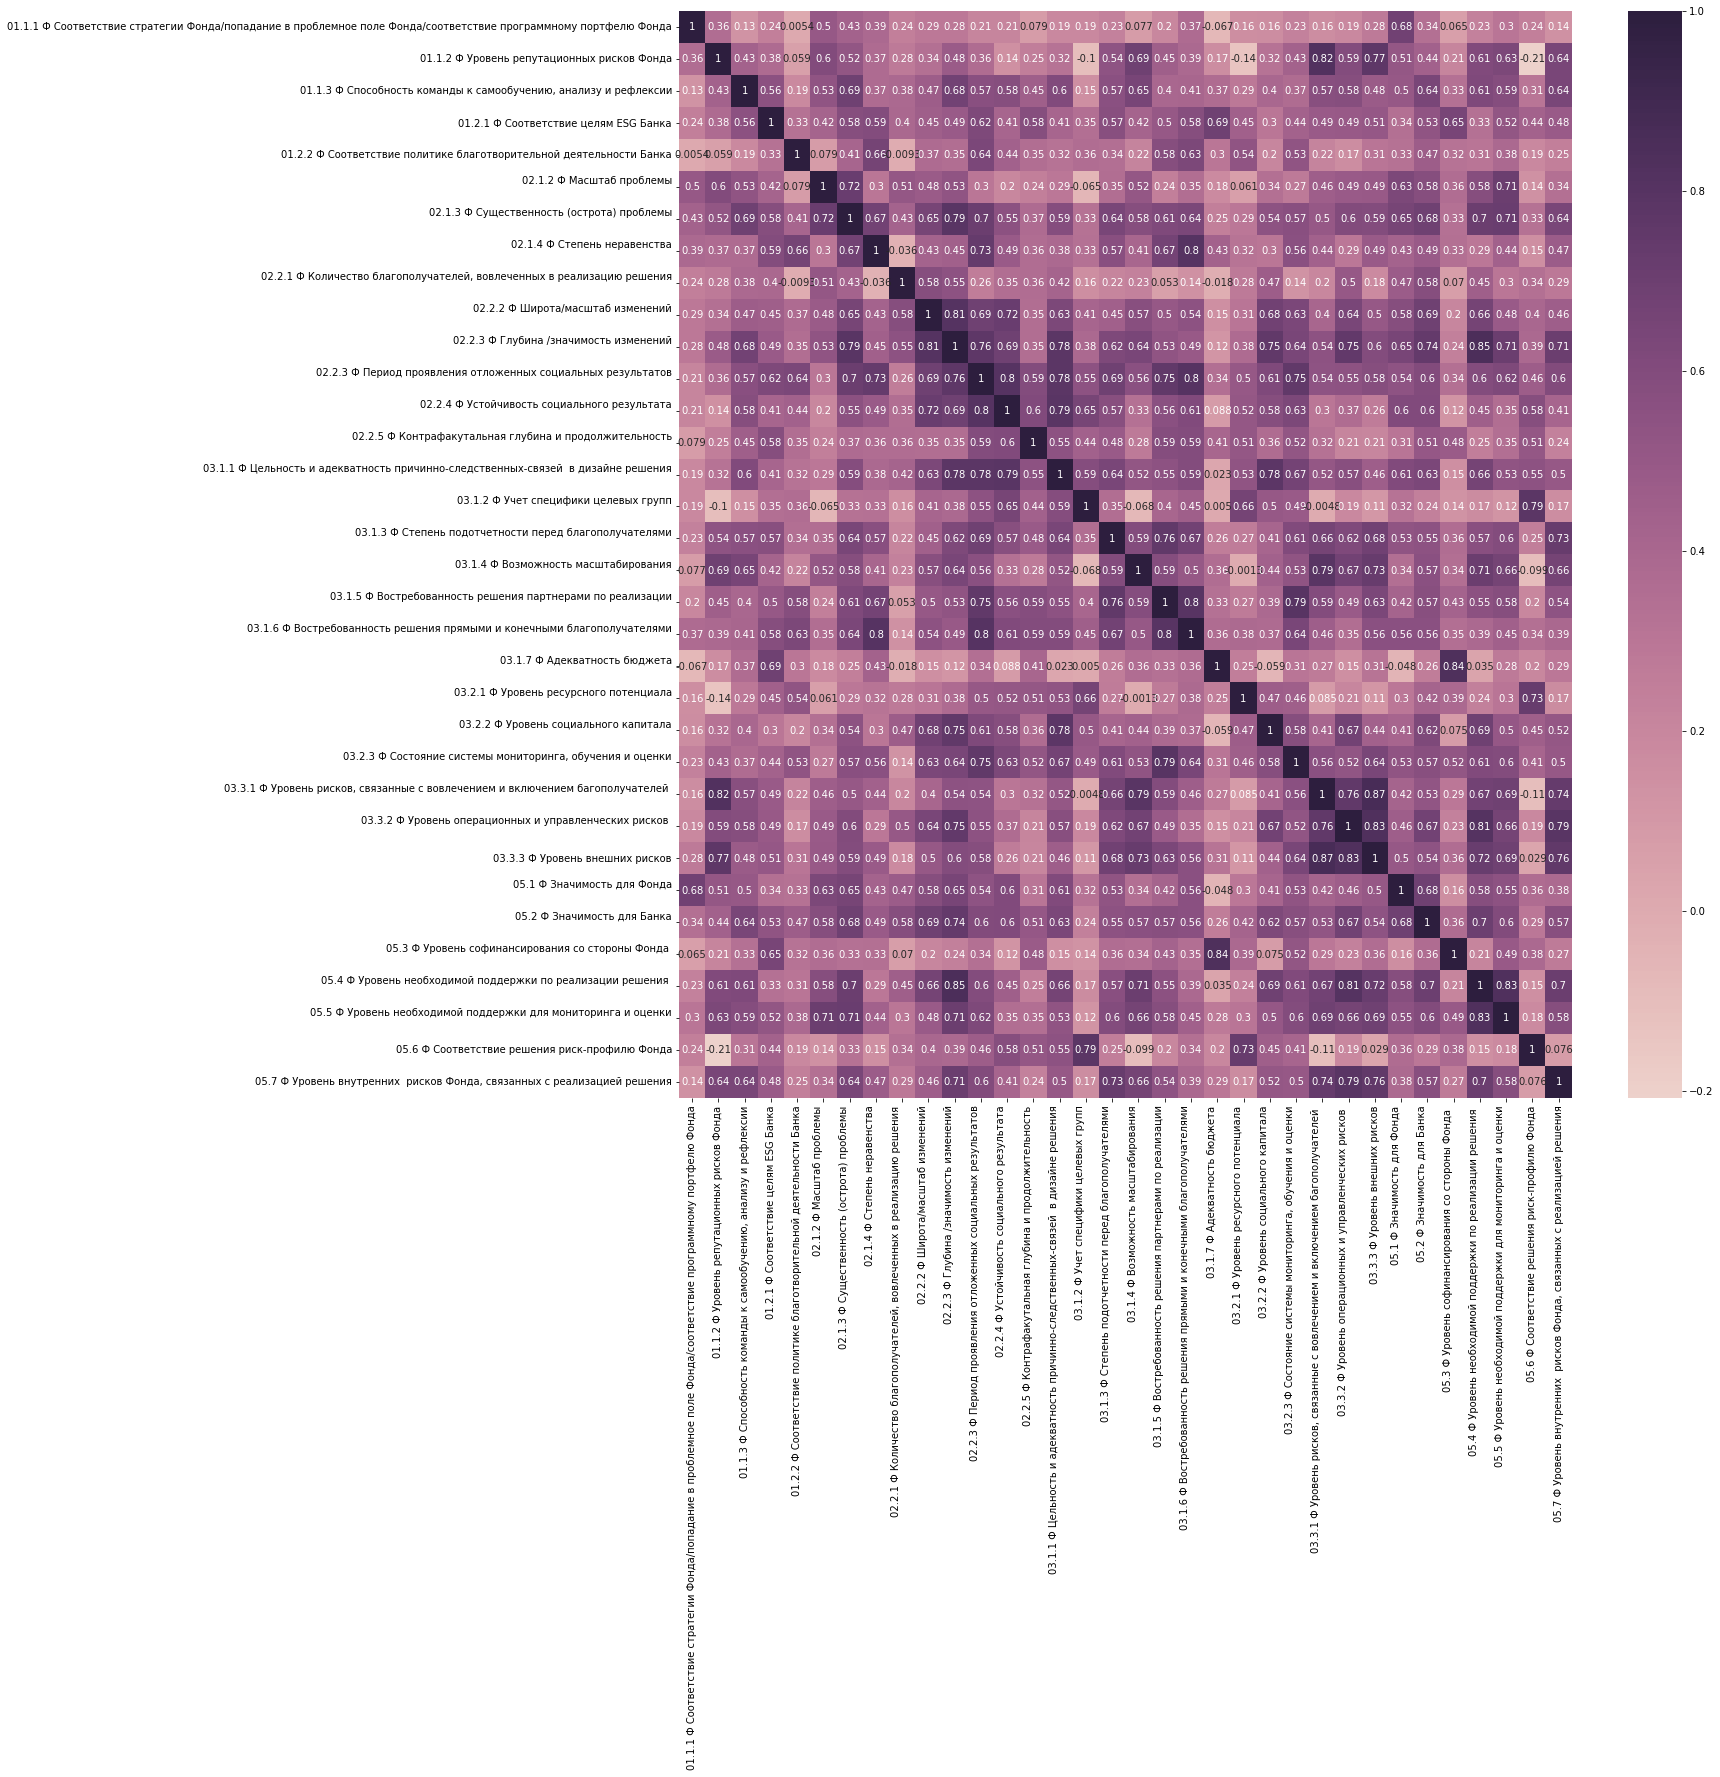

In [128]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(df1.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

## Минимальные

<Figure size 1440x1440 with 0 Axes>

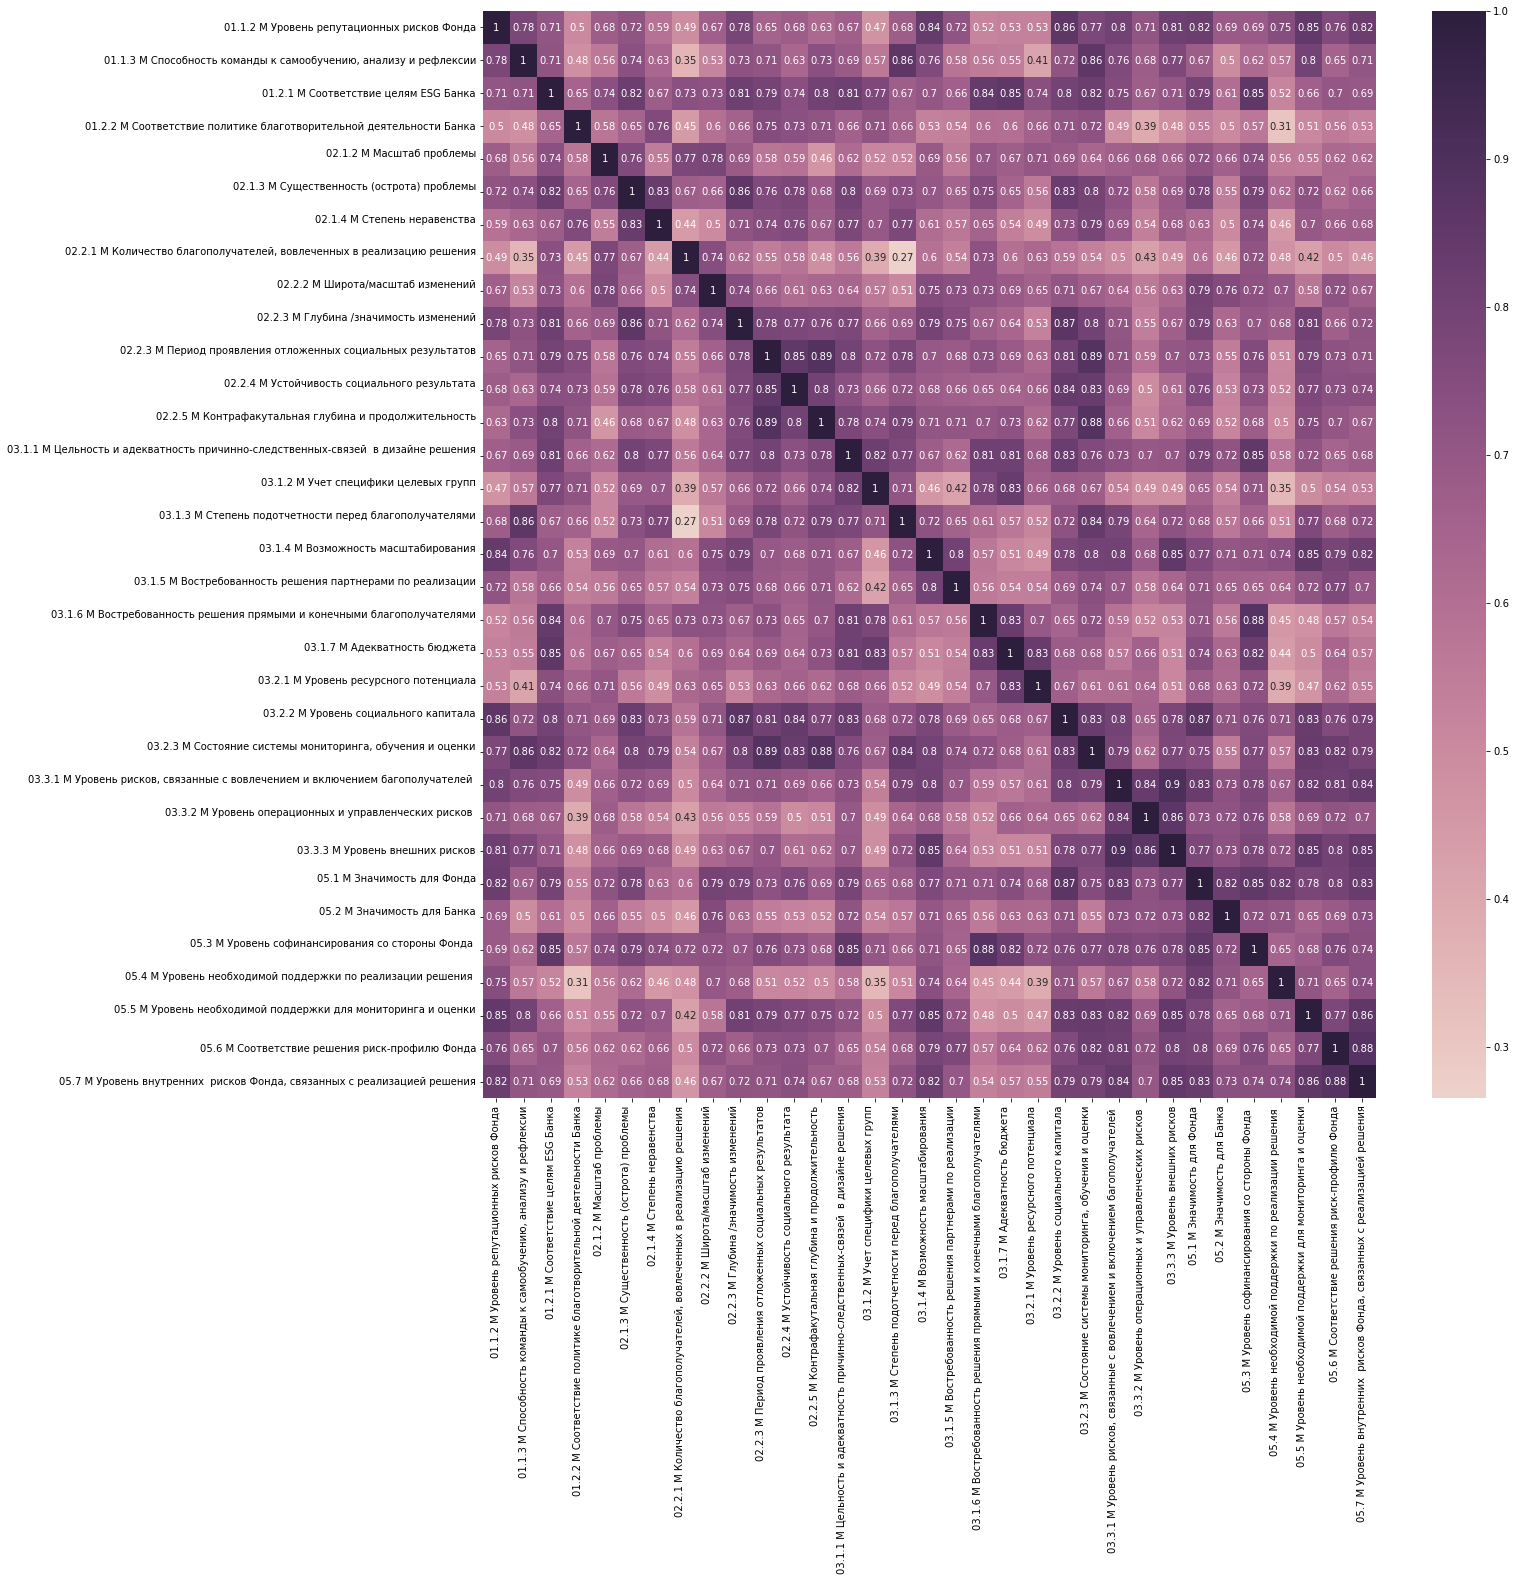

In [129]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(df2.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

## Категорийные

In [130]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                                                                                          Non-Null Count  Dtype 
---  ------                                                                                          --------------  ----- 
 0   Каковы вовлеченные группы, для которых будет получены социальные результаты?                    42 non-null     object
 1   Кто является конечным благополучателем решения?  Выберите группу или группы из библиотеки.      42 non-null     object
 2   Кто является прямым благополучателем решения?  Выберите группу или группы из библиотеки.        42 non-null     object
 3   Каков импакт-тезис решения?                                                                     42 non-null     object
 4   Какова цель реализации решения?                                                                 42 non-null     object
 5   Какие типовые  социальны

In [135]:
df3 = df3.drop('ссылка', axis=1)

In [137]:
categorical = pd.get_dummies(df3)

In [186]:
categorical.shape

(42, 202)

In [15]:
df = df.drop('Навзвание', axis=1)

In [142]:
df4 = df4.join(categorical)

In [143]:
df4.head()

,01.1.1 Ф Соответствие стратегии Фонда/попадание в проблемное поле Фонда/соответствие программному портфелю Фонда,01.1.2 Ф Уровень репутационных рисков Фонда,"01.1.3 Ф Способность команды к самообучению, анализу и рефлексии",01.2.1 Ф Соответствие целям ESG Банка,01.2.2 Ф Соответствие политике благотворительной деятельности Банка,02.1.2 Ф Масштаб проблемы\n,02.1.3 Ф Существенность (острота) проблемы\n,02.1.4 Ф Степень неравенства\n,"02.2.1 Ф Количество благополучателей, вовлеченных в реализацию решения\n",02.2.2 Ф Широта/масштаб изменений\n,...,К какому типу относится представленное решение?_Разработка модели и демонстрация эффективности,К какому типу относится представленное решение?_Разработка нового или существенная переработка старого продукта,Насколько высокие требования необходимо предъявить к уровню доказательности для этого решения?_0,"Насколько высокие требования необходимо предъявить к уровню доказательности для этого решения?_Высокий уровень доказательности (8-10 баллов). Вы способны продемонстрировать причинно-следственную связь, используя метод контрольной (или сравнительной) группы или иным приемлемым способом. У Вас выполнены одна или несколько независимых оценок репликации, которые подтверждают эти выводы. У вас есть учебные пособия, системы и процедуры, которые устанавливают единые требования к репликации и обеспечивают получение положительного социального эффекта.","Насколько высокие требования необходимо предъявить к уровню доказательности для этого решения?_Слабая доказательная база, заявитель способен логично, последовательно и убедительно рассказать о том, что собирается делать в рамках реализации решения и почему реализация решения важна для общества (имеет социальную значимость). Минимальным возможный уровень доказательной базы опирается на хорошо разработанный тезис о социальном воздействии.","Насколько высокие требования необходимо предъявить к уровню доказательности для этого решения?_Средний уровень доказательной базы (5-7 баллов). Вы зафиксировали данные, подтверждающие наличие положительного эффекта, однако вы не можете доказать, что изменения являются следствием вашей работы или эти докахательства основаны только на мнении благополучателей или экспертов.",Каков размер бюджета решения?_Крупный (от 10 млн. руб. до 50 млн.руб),Каков размер бюджета решения?_Малый (500 т. руб. - 1 млн. руб.),Каков размер бюджета решения?_Средний (1 млн. руб. - 10 млн. руб.),Каков размер бюджета решения?_нет информации
0,8,8,1.0,4,0.0,7,1,3,1,1,...,0,1,0,0,0,1,1,0,0,0
1,8,8,7.0,9,0.0,7,8,8,6,8,...,0,0,0,1,0,0,1,0,0,0
2,7,6,5.0,5,5.0,9,8,3,8,7,...,0,1,0,1,0,0,1,0,0,0
3,9,7,0.0,5,4.0,8,6,4,8,7,...,0,0,0,1,0,0,1,0,0,0
4,5,1,0.0,5,10.0,3,4,8,3,8,...,0,0,0,0,0,1,0,1,0,0


In [171]:
sc= MaxAbsScaler()
sc = sc.fit_transform(df4)
df4_mas = pd.DataFrame(sc, columns = df4.columns)
df4_mas.head(10)
df4_mas.shape

,01.1.1 Ф Соответствие стратегии Фонда/попадание в проблемное поле Фонда/соответствие программному портфелю Фонда,01.1.2 Ф Уровень репутационных рисков Фонда,"01.1.3 Ф Способность команды к самообучению, анализу и рефлексии",01.2.1 Ф Соответствие целям ESG Банка,01.2.2 Ф Соответствие политике благотворительной деятельности Банка,...,"Насколько высокие требования необходимо предъявить к уровню доказательности для этого решения?_Средний уровень доказательной базы (5-7 баллов). Вы зафиксировали данные, подтверждающие наличие положительного эффекта, однако вы не можете доказать, что изменения являются следствием вашей работы или эти докахательства основаны только на мнении благополучателей или экспертов.",Каков размер бюджета решения?_Крупный (от 10 млн. руб. до 50 млн.руб),Каков размер бюджета решения?_Малый (500 т. руб. - 1 млн. руб.),Каков размер бюджета решения?_Средний (1 млн. руб. - 10 млн. руб.),Каков размер бюджета решения?_нет информации
0,0.888889,0.888889,0.111111,0.444444,0.0,...,1.0,1.0,0.0,0.0,0.0
1,0.888889,0.888889,0.777778,1.000000,0.0,...,0.0,1.0,0.0,0.0,0.0
2,0.777778,0.666667,0.555556,0.555556,0.5,...,0.0,1.0,0.0,0.0,0.0
3,1.000000,0.777778,0.000000,0.555556,0.4,...,0.0,1.0,0.0,0.0,0.0
4,0.555556,0.111111,0.000000,0.555556,1.0,...,1.0,0.0,1.0,0.0,0.0
5,0.666667,0.444444,0.777778,0.555556,0.4,...,1.0,0.0,0.0,0.0,1.0
6,0.222222,0.777778,0.444444,0.555556,0.3,...,0.0,1.0,0.0,0.0,0.0
7,0.555556,0.222222,0.777778,0.555556,0.2,...,0.0,0.0,0.0,0.0,1.0
8,0.888889,0.222222,0.777778,0.555556,0.2,...,0.0,0.0,0.0,0.0,1.0
9,0.666667,0.333333,0.333333,0.555556,0.8,...,0.0,0.0,0.0,0.0,1.0


(42, 270)

In [174]:
pca = PCA(n_components = 0.95)
pca.fit(df4_mas)
df4_pca = pca.transform(df4_mas)
df4_pca

PCA(n_components=0.95)

array([[ 2.06511118e+00,  1.61827770e-01, -1.00614431e-03, ...,
         1.59973991e-01,  2.33904957e-02,  5.24939531e-02],
       [-1.31126312e+00,  1.08170125e+00, -2.74444906e-01, ...,
        -8.26981953e-02, -2.82480256e-01, -4.47395069e-02],
       [ 7.25711140e-01,  1.53285012e+00, -4.86039875e-01, ...,
         5.11427624e-01, -2.16994516e-01,  9.55657282e-02],
       ...,
       [ 1.46200569e+00, -1.62434820e+00,  3.04226568e-01, ...,
         1.07337070e+00,  6.53253707e-01,  1.14996098e-01],
       [ 1.09900787e+00, -1.49951218e+00,  6.61305383e-01, ...,
        -3.69156097e-01, -5.22216869e-01, -2.86437663e-01],
       [ 4.55752593e-01, -1.20278948e+00,  3.29138978e-01, ...,
        -3.96642383e-01, -9.71884798e-02,  1.39792166e-01]])

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=1)

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6)

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=7)

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans()

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=9)

Text(0.5, 1.0, 'Elbow method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Inertia')

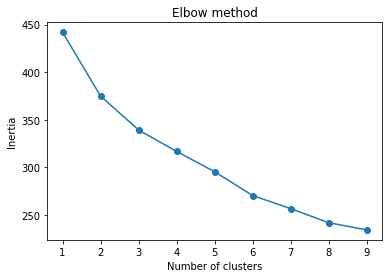

In [175]:
inertias = []
for i in range(1,10):
 kmeans = KMeans(n_clusters=i)
 kmeans.fit(df4_pca)
 inertias.append(kmeans.inertia_)
plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


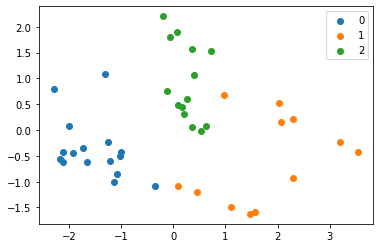

In [177]:
kmeans = KMeans(n_clusters = 3)
label = kmeans.fit_predict(df4_pca)
c3label = label
u = np.unique(label)
fig, ax = plt.subplots()
for i in u:
    plt.scatter(df4_pca[label == i , 0], df4_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [178]:
def make_autopct(values): #percentage function
 def my_autopct(pct):
    total = sum(values)
    val = int(round(pct*total/100.0))
    return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
 return my_autopct
c1 = Counter(label)
c1

Counter({1: 12, 0: 16, 2: 14})

In [179]:
pr1 = np.array([12, 16, 14])

([<matplotlib.patches.Wedge at 0x18d685dbe80>,
 [Text(0.6858387475358717, 0.8600146582346299, 'Second cluster'),
  Text(-1.0877139256592978, 0.16394638125570068, 'First cluster'),
  Text(0.5500001486524352, -0.9526278583383436, 'Third cluster')],
 [Text(0.37409386229229363, 0.4690989044916162, '28.57% (12)'),
  Text(-0.5932985049050715, 0.08942529886674583, '38.10% (16)'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33% (14)')])

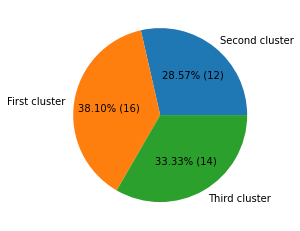

In [180]:
mylabels = ["Second cluster", "First cluster", "Third cluster"]  #Cluster visualization
plt.pie(pr1, labels=mylabels, autopct=make_autopct(pr1))
plt.show()

In [181]:
dflabel3 = pd.DataFrame(df4.copy())
dflabel3['Cluster'] = c3label
dflabel3.head()

,01.1.1 Ф Соответствие стратегии Фонда/попадание в проблемное поле Фонда/соответствие программному портфелю Фонда,01.1.2 Ф Уровень репутационных рисков Фонда,"01.1.3 Ф Способность команды к самообучению, анализу и рефлексии",01.2.1 Ф Соответствие целям ESG Банка,01.2.2 Ф Соответствие политике благотворительной деятельности Банка,...,Каков размер бюджета решения?_Крупный (от 10 млн. руб. до 50 млн.руб),Каков размер бюджета решения?_Малый (500 т. руб. - 1 млн. руб.),Каков размер бюджета решения?_Средний (1 млн. руб. - 10 млн. руб.),Каков размер бюджета решения?_нет информации,Cluster
0,8,8,1.0,4,0.0,...,1,0,0,0,1
1,8,8,7.0,9,0.0,...,1,0,0,0,0
2,7,6,5.0,5,5.0,...,1,0,0,0,2
3,9,7,0.0,5,4.0,...,1,0,0,0,2
4,5,1,0.0,5,10.0,...,0,1,0,0,1


In [182]:
dfbylabel3 = pd.DataFrame({'features': list(dflabel3)})
dfbylabel3['1 mean'] = list(dflabel3.loc[dflabel3['Cluster'] == 0].mean())
dfbylabel3['2 mean'] = list(dflabel3.loc[dflabel3['Cluster'] == 1].mean())
dfbylabel3['3 mean'] = list(dflabel3.loc[dflabel3['Cluster'] == 2].mean())
pd.set_option('display.max_rows', 300)
dfbylabel3
pd.set_option('display.max_rows', 20)

,features,1 mean,2 mean,3 mean
0,01.1.1 Ф Соответствие стратегии Фонда/попадани...,6.2500,5.083333,6.571429
1,01.1.2 Ф Уровень репутационных рисков Фонда,6.3125,3.500000,6.071429
2,"01.1.3 Ф Способность команды к самообучению, а...",6.5625,3.000000,4.857143
3,01.2.1 Ф Соответствие целям ESG Банка,7.0000,4.750000,5.000000
4,01.2.2 Ф Соответствие политике благотворительн...,6.1875,3.666667,5.214286
5,02.1.2 Ф Масштаб проблемы\n,6.6250,4.333333,5.857143
6,02.1.3 Ф Существенность (острота) проблемы\n,6.7500,3.583333,6.357143
7,02.1.4 Ф Степень неравенства\n,6.6875,3.583333,5.285714
8,"02.2.1 Ф Количество благополучателей, вовлечен...",6.1875,5.000000,5.500000
9,02.2.2 Ф Широта/масштаб изменений\n,6.1875,4.000000,5.928571


In [184]:
dfbylabel3.to_excel("output.xlsx")